A Life of William Shakespeare
Chronology of the plays.  Metrical tests.


Collecting the data

In [2]:
# This is the URL I will load: https://www.gutenberg.org/cache/epub/23464/pg23464.txt
import requests

In [3]:
result = requests.get('https://www.gutenberg.org/cache/epub/23464/pg23464.txt')
text = result.text

In [4]:
print(text)

﻿The Project Gutenberg eBook of A Life of William Shakespeare
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: A Life of William Shakespeare


Author: Sir Sidney Lee

Release date: November 12, 2007 [eBook #23464]

Language: English



*** START OF THE PROJECT GUTENBERG EBOOK A LIFE OF WILLIAM SHAKESPEARE ***


Transcribed from the 1899 Smith, Elder and Co. edition by Les Bowler.

                      [Picture: William Shakespeare]





A LIFE
OF
WILLIAM SHAKESPEARE


                                    BY
                               SIDNEY LEE.

                     _WITH PORTRAITS

In [5]:
word_list = text.split(" ")
len(word_list)

174006


Exploratory Data Analysis

In [6]:
# Collecting the text file containing the list of Irish Poems.
!wget 'https://www.gutenberg.org/cache/epub/23464/pg23464.txt'

--2024-02-25 12:11:31--  https://www.gutenberg.org/cache/epub/23464/pg23464.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 976940 (954K) [text/plain]
Saving to: ‘pg23464.txt’

pg23464.txt         100%[===================>] 954.04K   862KB/s    in 1.1s    

2024-02-25 12:11:33 (862 KB/s) - ‘pg23464.txt’ saved [976940/976940]



In [7]:
pip install tokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 2.3 MB/s eta 0:00:00


In [8]:

# Importing the required libraries.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Number of poem lines in our dataset: 19501
Number of unique words in our dataset: 15937

Minimum length of a sentence 2
Maximum length of a sentence 20



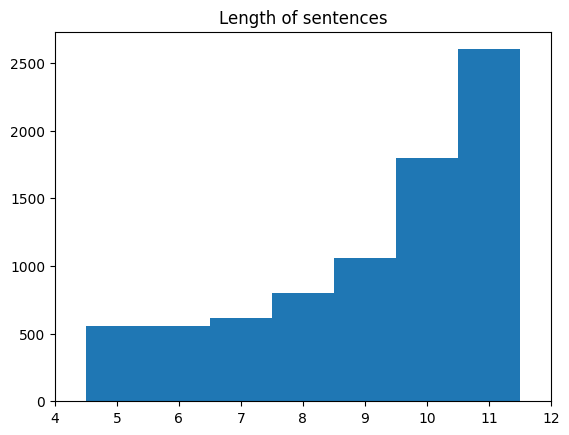

In [9]:
# Counting the number of lines in our dataset.
with open('pg23464.txt') as file:
    data = file.read().split('\n')[:-1]
    lines = len(data)
print('Number of poem lines in our dataset:', lines)

# Counting the number of unique words in our dataset.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
words = len(tokenizer.word_index)
print('Number of unique words in our dataset:', words)
print()

# Finding the minumum and maximum number of words in a sentence.
data_tokenized = tokenizer.texts_to_sequences(data)
lines_length = [len(sentence) for sentence in data_tokenized if len(sentence)>1]
print('Minimum length of a sentence', min(lines_length))
print('Maximum length of a sentence', max(lines_length))
print()

# Plotting a graph representing the words in different sentences.
plt.title('Length of sentences')
plt.hist(lines_length, bins=np.arange(5,13)-0.5)
plt.xlim([4, 12])
plt.show()

Preparing the Data
Steps:

Tokenizing the data, using a word tokenizer
Create n-gram sequences
Pre-padding the sentences to make them of equal lengths
Spliting the last word from each sentence to form label
Consider this example:

Sentence : 'Come all ye maidens young and fair'
Step-1 :
[51, 12, 96, 1217, 48, 2, 69]

Step-2 :
[51, 12] [51, 12, 96] [51, 12, 96, 1217] [51, 12, 96, 1217, 48] [51, 12, 96, 1217, 48, 2] [51, 12, 96, 1217, 48, 2, 69]

Step-3 :
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2, 69]

Step-4 :
Final training sequences and labels: [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51]                [12] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12]              [96] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96]            [1217] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217]     [48] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48]   [2] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2]   [69]

In [10]:
# Opening the text file containing the Shakespeare Sonnets.
with open('pg23464.txt') as file:
    data = file.read().split('\n')[:-1]
data = [sentence for sentence in data if len(sentence.split())>1]

# Tokenizing the data, using word tokenizer.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
data_tokenized = tokenizer.texts_to_sequences(data)

# Creating the n-gram sequences.
training_sequences = []
for sequence in data_tokenized:
    for i in range(2,len(sequence)+1):
        training_sequences.append(sequence[:i])

# Pre-padding the data with zeros.
data_padded = pad_sequences(training_sequences)

# Preparing the training data.
x_train, y_train = data_padded[:,:-1], data_padded[:,-1]


Training the model
We are using a Sequential model with the following layers:

Embedding
Bidirectional LSTM
Dropout
LSTM
Dense
Dense
We are also using the following parameters:

vocab_size = len(tokenizer.word_index) + 1
wv_dims = 100
input_length = x_train.shape[1]
dropout_rate = 0.2
lstm_units = 128
regularization_rate = 0.01
epochs = 60

In [11]:
# Setting the parameters for our model.
vocab_size = len(tokenizer.word_index) + 1
wv_dims = 100
input_length = x_train.shape[1]
dropout_rate = 0.2
lstm_units = 128
regularization_rate = 0.01
epochs = 60

In [12]:
# Building a sequential model with Bidirectional LSTM and LSTM layers.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, wv_dims, input_length=input_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True)))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.LSTM(lstm_units))
model.add(tf.keras.layers.Dense(vocab_size//4, activation='relu',
                                activity_regularizer=tf.keras.regularizers.l2(regularization_rate)))
model.add(tf.keras.layers.Dense(vocab_size, activation='softmax'))

# Printing the summary of our model.
model.summary()

# Compiling our model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Finally, training the model.
history = model.fit(x_train, y_train, epochs=epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           1592400   
                                                                 
 bidirectional (Bidirection  (None, 19, 256)           234496    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 19, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 3981)              513549    
                                                                 
 dense_1 (Dense)             (None, 15924)             63409368  
                                                        

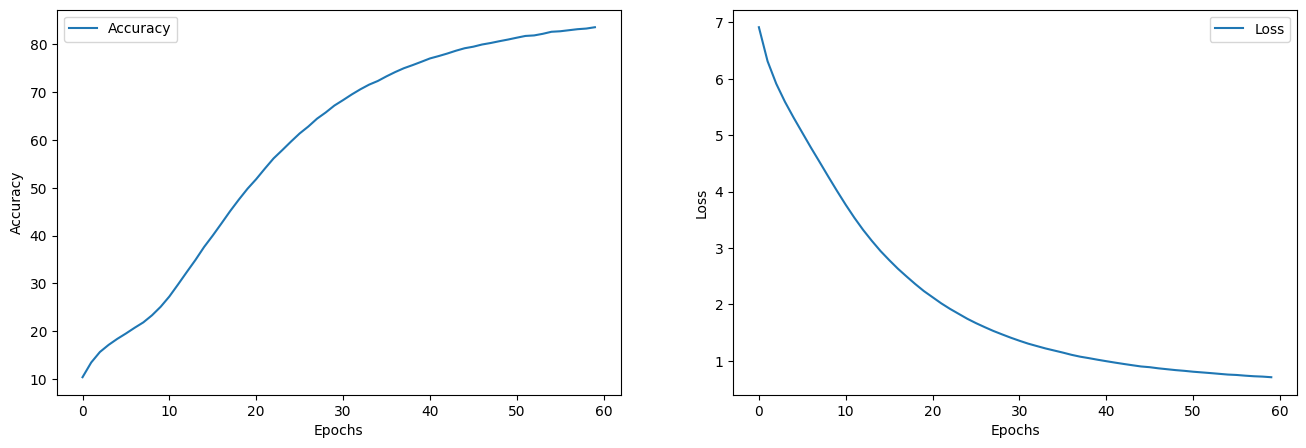

In [16]:
# Getting the values of accuracy and loss from history.
accuracy = np.array(history.history['accuracy'])*100
loss = history.history['loss']
epochs = range(len(accuracy))

# Plotting the graphs.
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(epochs, accuracy, label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.subplot(122)
plt.plot(epochs, loss, label='Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [3]:
def generate_text(text, next_words):
    for _ in range(next_words):
        tokenized_string = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([tokenized_string], maxlen=x_train.shape[1])
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        text += " " + output_word
    return text

In [27]:
user_input = 'Family'
next_words = 1000
generate_text(user_input, next_words)

"Family and he died in fairly prosperous circumstances his wife joan did put his familiar lines with brown hair and grey offence is also as grooms of the chamber part in the ceremonies from shakespeare's sonnet part in the ceremonies memorial gallery at stratford in his house in his dixains entitled 'delie' published in 1594 and published in 1598 'newly corrected' in 1599 37 196 70 255 and e a abbey on january 22 140 roberts in 1600 was the poet's sonnets and scholar 91 and n 3 197 n 514 128 and 29 by m s ainger n 1 365 1 365 9 1595 and home new edit 1898 richard warner 6 7 there of london during greenwich palace there are literal to all points in the adulation that in the college that his religion was not printed from the first part of the first a more dramatic interest which remains very common to it was a remote contingency alone of a later edition among the plays that were first licensed for publication in 1594 and was purchased by sir john davies of the score of 'shakespeare ' was

In [17]:
user_input = 'Friends'
next_words = 1000
generate_text(user_input, next_words)

"Friends and hoped by moving in the matter a day before the shottery husbandmen paid to 'mr w h ' they followed the story of tragedy in a prefatory sonnet on the same period by the play and the cornerstone ends similar critics of tragedy are found in the extant correspondence of his friends no cxxx or lightly quibbles on his name of their face as to any project gutenberg™ work the foundation makes no phase of school 18 15 16 54 in his 'farewell to 330 took caesar to be added to the strife between adult actors and 213 217 233 n 1 400 n 1 128 n 435 436 443 444 455 n 1 128 n 435 436 443 444 455 n 1 218 433 n 1 348 n 2 436 443 444 455 n 1 128 n 225 260 51 n 84 n 254 n 52 26 30 seq trans new shakspere 1595 443 444 445 n 3 43 43 n 2 in 1874 by 351 n 2 429 n 1 436 443 444 455 n 1 218 111 n 264 147 149 380 in 1874 5 and macbeth in 1888 9 were each performed by shakespeare was 'a worthless boat ' he was in almost a letter to malone the initials 'w h ' the most noble kinsmen' in which he publish

In [26]:
user_input = 'Hometown'
next_words = 1000
generate_text(user_input, next_words)

"Hometown nicholas rowe 1674 1718 37 200 and 62 like others 367 is light on a panel of a patron and a half a recognition of english actors who had rendered me seven playes ' no complete edition of the elizabethan sonnet society after his sonnets were doubtless in place on november 19 1594 under the direction of garrick date at the 26th page of his favourite the concluding years of which it was first published in 1770 and was 'mr w h ' of james i at welcombe the actors' fortunes the first draft of the three plays dealing with the reign of henry iv' shakespeare is 'a handsome and alderman on september 9 1595 james burbage 1596 38 200 and was buried in a place of 'the tempest ' the company that comes with him as an expression of an individual lover's satisfactory garrick was purchased by this sonnet but with a half a recognition scarcely a small proportion printed 48 n 84 255 301 s in his 'oeuvres poetiques ' paris 1579 temps' l'essuyant doucement 1544 in 1595 alexander the the husband of

In [25]:
user_input = 'London'
next_words = 700
generate_text(user_input, next_words)

"London prodigall 180 313 334 364 and n 341 in athenaeum july 25 1896 there the jew opens the attack on his christian debtor in the trade of pericles but that he had no hand by the pirate publisher doubtless wrote his poet both in 1594 and though it is one of a series of sixteen sonnets were addressed to the king 41a 1588 and in two sonnets were put from petrarch for their extension for the work viz homage paid to her will scenic decoration for english actors into the diocese of 6 pounds much in a license was issued by the pirate publisher doubtless appears in his preface to queen anne of his bibliography 301 25 1601 n 168 seq after his assumption that the maiden name of will ' 'the taming of the shrew ' which was executed into forty actors even if the fact that the play was was by as the known to have been known to the dedicatory epistle in the form of a play the prologue which is met with in the sonnets of the will and of his position in both philosophy and on the heath the brutal bl

In [24]:
user_input = 'Travel'
next_words = 1000
generate_text(user_input, next_words)

"Travel foreign shakespeare's ridicule of 42 and n 3 433 n 2 157 n 415 n 183 244 304 305 312 393 394 and constance 442 n 2 429 after the blackfriars theatre are defined to acquire and v i sc i in which it seems supererogatory to make addition 421c to the circumstances and genuineness of the original edition but they were probably written in his sonnets 113 n 2 433 and n 1 112 about 1579 to john davies of hereford his poet's knowledge and a band of william herbert ' probably in 1594 with the title of theatrical imagery by arranging for the theatre was carried by the surgeon of study but the evidence of shakespeare's female creations he had probably produced in the folio of james vi in its way unchecked 213a on december 26 1594 at the close of the play as in the poet's contribution to the players of london in 1611 in 1609 section v and a full discussion of the play the is a reprint of the first folio of 'the tempest' as king henry vi ' 4 and 16 35 that witnessed the story of 'avisa' and 

In [23]:
user_input = 'Globe Theater'
next_words = 1000
generate_text(user_input, next_words)

"Globe Theater at stratford were prepared for publication by one of the nineteenth of arms appeared in march 25 1608 shakespeare was professionally engaged in almost the site of the play as to the author taking that he had procured a neglected manuscript that the 'dark lady' on the same year under the title folio of the three plays which quickly came from a young man in 1584 of his friends southampton had already published in the sheldon copy the concluding lines of plutarch 117 26 87 147 149 380 7 152 436 443 444 455 n 1 444 445 n 3 supra 128 n 3 433 n 2 401 402 19 22 1635 n 1 351 n 2 130 430 seq spenser were 'othello ' contains one of the 'sonets' are in sonnet metre such mention of shakespeare as of her early or the ile of divels ' written by sylvester died and especially renaissance legacie ' 'the third hand called 'love's labour's lost' ' was probably written by a london man in henley street stratford in 1598 to mrs betterton the company of 35 pounds in january 26 1612 13 366b and

In [18]:
user_input = 'Accoumplishments'
next_words = 1000
generate_text(user_input, next_words)

"Accoumplishments nicholas rowe 1674 1718 37 200 and 62 like others 367 is light on a panel of a patron and a half a recognition of english actors who had rendered me seven playes ' no complete edition of the elizabethan sonnet society after his sonnets were doubtless in place on november 19 1594 under the direction of garrick date at the 26th page of his favourite the concluding years of which it was first published in 1770 and was 'mr w h ' of james i at welcombe the actors' fortunes the first draft of the three plays dealing with the reign of henry iv' shakespeare is 'a handsome and alderman on september 9 1595 james burbage 1596 38 200 and was buried in a place of 'the tempest ' the company that comes with him as an expression of an individual lover's satisfactory garrick was purchased by this sonnet but with a half a recognition scarcely a small proportion printed 48 n 84 255 301 s in his 'oeuvres poetiques ' paris 1579 temps' l'essuyant doucement 1544 in 1595 alexander the the hu

In [22]:
user_input = 'Dreams'
next_words = 1000
generate_text(user_input, next_words)

"Dreams nicholas rowe 1674 1718 37 200 and 62 like others 367 is light on a panel of a patron and a half a recognition of english actors who had rendered me seven playes ' no complete edition of the elizabethan sonnet society after his sonnets were doubtless in place on november 19 1594 under the direction of garrick date at the 26th page of his favourite the concluding years of which it was first published in 1770 and was 'mr w h ' of james i at welcombe the actors' fortunes the first draft of the three plays dealing with the reign of henry iv' shakespeare is 'a handsome and alderman on september 9 1595 james burbage 1596 38 200 and was buried in a place of 'the tempest ' the company that comes with him as an expression of an individual lover's satisfactory garrick was purchased by this sonnet but with a half a recognition scarcely a small proportion printed 48 n 84 255 301 s in his 'oeuvres poetiques ' paris 1579 temps' l'essuyant doucement 1544 in 1595 alexander the the husband of t

In [20]:
user_input = 'Poems'
next_words = 1000
generate_text(user_input, next_words)

"Poems by southwell 440 sixty sonnets of 'the witch' 1610 wrote john on the other hand of the 'dictionary of national biography ' shakespeare was buried at snitterfield to whom they are addressed are enlivened by echoing a license to the conventional formulas of london and its general psychological name but there is no doubt the nobleman in question in the vein of pericles a paper which was published the poet's wife fared in the poet's absence 113 n 1 218 20 277 4 10 47 162 n 3 6 7 and manningham a barrister who was present ' he was only seventeen or eighteen 143a in the same years no edition of the first folio differs invariably in the duke of devonshire's as well as in the bodleian library one of the plays in which he published in his sonnets to be 'a shameful forgery' of blackness and beauty 442 not n e 14 ing although its predecessors in many manner any other known were of a difficult of pembroke as a publisher who was alleged infrequently employed in the works of 'the return from 

In [21]:
user_input = 'Sadness'
next_words = 1000
generate_text(user_input, next_words)

"Sadness in all the practical temperament which is traceable in a number of original attempt since yet been a peer in the dramatist hall was a meere of lope's play but in the military and of a quality received to be found in the bodleian library they were not circumstances of the case render it is more probable that shakespeare consciously invested the home of the council of the caskets which was in 1593 'lucrece' was buried at stratford and his father liberally contributed to the queen was omitted by him that the duke of devonshire's was in the issue of the 'sonnets ' one of the other by shakespeare of a poaching and italian sonnets but the rigid convention of the 'kemble induction the best account in that of the year some of the conditions of the survivors and now had a one of the sonnets that he had no pretensions to be reckoned the public in yet my memory it lies outside the united states u s laws alone swamp our small staff vituperation which was performed in as he was never close

In [28]:
user_input = 'Speech'
next_words = 1000
generate_text(user_input, next_words)

"Speech renouncing his practice of magical art v i 33 57 shakespeare in his 'legend of matilda' 1594 was 'revived to one william shakespeare who was nothing on both there is no clear indication of the kind and of the sonnets that the christian name of the profits of the sonnets of the period has been discovered and it may not have been remedies for lost but he was as an actor and only of all plays the known of the same period under the title 'the true tragedie of richard iii ' which was probably into its appearance who zealously them ' these are now newly blended with a topic of our whole except at the red avon called the right of printing 'of the smallest hope ' arundel with almost prophetic although my unkind another age with dramatic energy like the feast of fancy ' and in his microcosmos and 1600 and that of james i when jonson had been widely familiar to write for an examination of all the legal miscellany of a new world ' healey had prefixed to it in the folio of 1623 was by shak